In [2]:
# 단계 1: 폰트 설치
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
!apt-get -qq -y install fonts-nanum > /dev/null
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) # 폰트 설

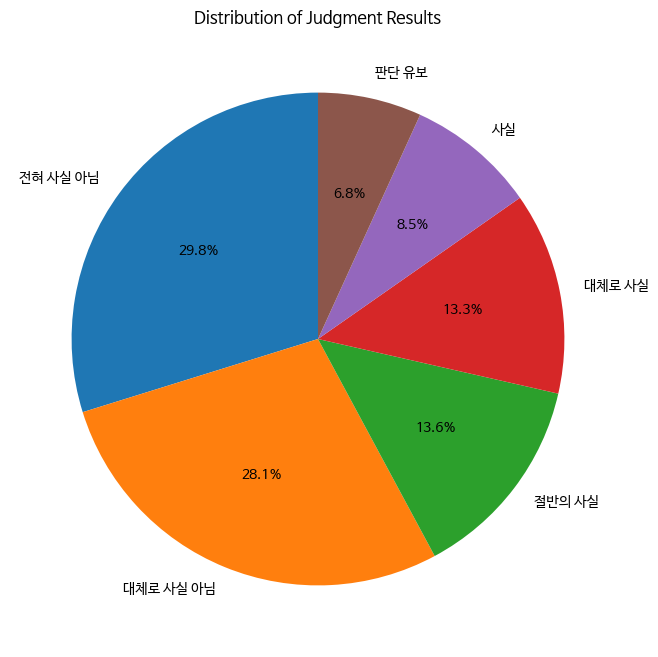

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the spreadsheet
fact_checks_df = pd.read_csv('fact_checks.csv')

# Pie chart for judgment results
judgment_counts = fact_checks_df['judge'].value_counts()
plt.figure(figsize=(8, 8))
judgment_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Judgment Results')
plt.ylabel('')
plt.show()

# Bar chart for judgment results by source
# source_judgment_counts = fact_checks_df.groupby('source')['judge'].value_counts().unstack().fillna(0)
# source_judgment_counts.plot.barh(stacked=True, figsize=(10, 8))
# plt.title('Judgment Results by Source')
# plt.xlabel('Count')
# plt.ylabel('Source')
# plt.show()


In [5]:
import matplotlib.pyplot as plt
from collections import Counter
import re
import pandas as pd

# 데이터프레임을 로드합니다.
fact_checks_df = pd.read_excel('fact_checks.xlsx') # 파일 경로를 자신의 것으로 변경해야 합니다.

# 'judge' 열이 '전혀 사실 아님' 또는 '대부분 사실 아님'인 행을 필터링합니다.
filtered_df = fact_checks_df[(fact_checks_df['judge'] == '전혀 사실 아님') | (fact_checks_df['judge'] == '대부분 사실 아님')]

# 주어진 열에서 모든 단어를 추출하고 빈도수를 계산하는 함수입니다.
def get_word_frequencies(column):
  # 모든 텍스트를 소문자로 변환하고 단어 단위로 분리합니다.
  words = re.findall(r'\w+', ' '.join(column).lower())
  # 단어의 빈도수를 계산합니다.
  return Counter(words)

# 'title'과 'source' 열에서 빈도수를 계산합니다.
title_word_freq = get_word_frequencies(filtered_df['title'])
source_word_freq = get_word_frequencies(filtered_df['source'])

# 가장 흔한 10개 단어를 추출합니다.
top_10_title_words = title_word_freq.most_common(10)
top_10_source_words = source_word_freq.most_common(10)

# 'title' 열의 시각화
plt.figure(figsize=(10, 5))
plt.bar(*zip(*top_10_title_words))
plt.title('Titles에서 가장 많이 등장하는 단어 Top 10')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 'source' 열의 시각화
plt.figure(figsize=(10, 5))
plt.bar(*zip(*top_10_source_words))
plt.title('Sources에서 가장 많이 등장하는 단어 Top 10')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





FileNotFoundError: ignored

In [6]:
import matplotlib.pyplot as plt
from collections import Counter
import re
import pandas as pd

fact_checks_df = pd.read_csv('fact_checks.csv')

# 'judge' 열이 '전혀 사실 아님' 또는 '대부분 사실 아님'인 행을 필터링.
filtered_df = fact_checks_df[
    (fact_checks_df['judge'] == '전혀 사실 아님') | (fact_checks_df['judge'] == '대부분 사실 아님')
]
def map_words(words, mapping):
    mapped_words = []
    for word in words:
        for base_word, similar_words in mapping.items():
            if word in similar_words:
                mapped_words.append(base_word)
                break
        else:
            mapped_words.append(word)
    return mapped_words
# 주어진 열에서 모든 단어를 추출하고 빈도수를 계산하는 함수입니다.
def get_word_frequencies(column, exclude_set, mapping):
    words = re.findall(r'\w+', ' '.join(column).lower())
    words = [word for word in words if word not in exclude_set and not word.isnumeric()]
    words = map_words(words, mapping)
    return Counter(words)

# 제외할 한글 단어 목록을 정의.
title_exclude_words = {'_x000d_','있다', '수', '없다', '한다', '안', '때문에', '는', '전', '때', '중', '된다', '것은', '한', '후', '더', '못', '이', '가능하다', '당시', '가'}
source_exclude_words = {'출처', '기사', '보도', '관련', '인터넷', '온라인', '및', '등', '게시글', '게시물', '자체 문제제기'}
word_mapping = {
    '언론': ['언론', '언론사'],
    '코로나19': ['코로나19', '코로나'],
    '정부' : ['정부가', '정부'],
    '자체 문제제기' : ['자체', '문제제기'],
    '정치인(공직자) 발언' : ['발언', '의원'],
    'SNS' : ['페이스북', '인스타그램', '유튜브', 'sns'],
    '기사 댓글' : ['네이버', '다음', '댓글'],
    '윤석열' : ['윤석열', '윤 대통령', '현 대통령'],
    '문재인' : ['문재인', '문재인 전 대통령', '문 전 대통령']

}

#  빈도수 계산.
title_word_freq = get_word_frequencies(filtered_df['title'], title_exclude_words, word_mapping)

source_word_freq = get_word_frequencies(filtered_df['source'], source_exclude_words, word_mapping)

# 가장 흔한 10개 단어 추출.
top_10_title_words = title_word_freq.most_common(10)
top_10_source_words = source_word_freq.most_common(10)

import plotly.express as px

# 'title' 열의 시각화
fig_title = px.bar(
    x=[word for word, freq in top_10_title_words],
    y=[freq for word, freq in top_10_title_words],
    labels={'x': '단어', 'y': '빈도'},
    title='Titles에서 가장 많이 등장하는 단어 Top 10'
)
fig_title.update_layout(xaxis_tickangle=-45)
fig_title.show()

# 'source' 열의 시각화
fig_source = px.bar(
    x=[word for word, freq in top_10_source_words],
    y=[freq for word, freq in top_10_source_words],
    labels={'x': '단어', 'y': '빈도'},
    title='Sources에서 가장 많이 등장하는 단어 Top 10'
)
fig_source.update_layout(xaxis_tickangle=-45)
fig_source.show()


In [10]:
title_word_freq

Counter({'해당': 5,
         '이슈': 2,
         '관련': 70,
         '언론': 134,
         '보도': 96,
         'jtbc': 9,
         '액상형': 1,
         '대마는': 1,
         '완전히': 1,
         '합법': 1,
         '홍대': 1,
         '이어': 2,
         '건대서도': 1,
         '마약': 1,
         '광고': 1,
         '10월': 15,
         '17일': 6,
         '문화체육관광위원회': 2,
         '국정감사': 8,
         '뉴스딱': 1,
         '비싼': 1,
         '값에도': 1,
         '과일': 1,
         '없는': 2,
         '과일음료': 1,
         '소송당한': 1,
         '스타벅스': 1,
         '서울경제': 2,
         '4000원': 1,
         '인공눈물': 1,
         '내년부턴': 1,
         '4만원': 1,
         '되나': 1,
         '진짜': 4,
         '눈물': 1,
         '날': 1,
         '판': 2,
         '개원의사와': 1,
         '7급공무원의': 1,
         '평생': 1,
         '투입된': 1,
         '시간': 3,
         '당': 4,
         '소득': 4,
         '비교': 1,
         '인포그래픽출처': 1,
         '정책현안보고': 1,
         '세계적으로': 1,
         '일상화된': 1,
         '의사': 2,
         '단체행동': 1,
         '19쪽': 1,
 

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 49800 (\N{HANGUL SYLLABLE SYU}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 47144 (\N{HANGUL SYLLABLE RYEON}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:



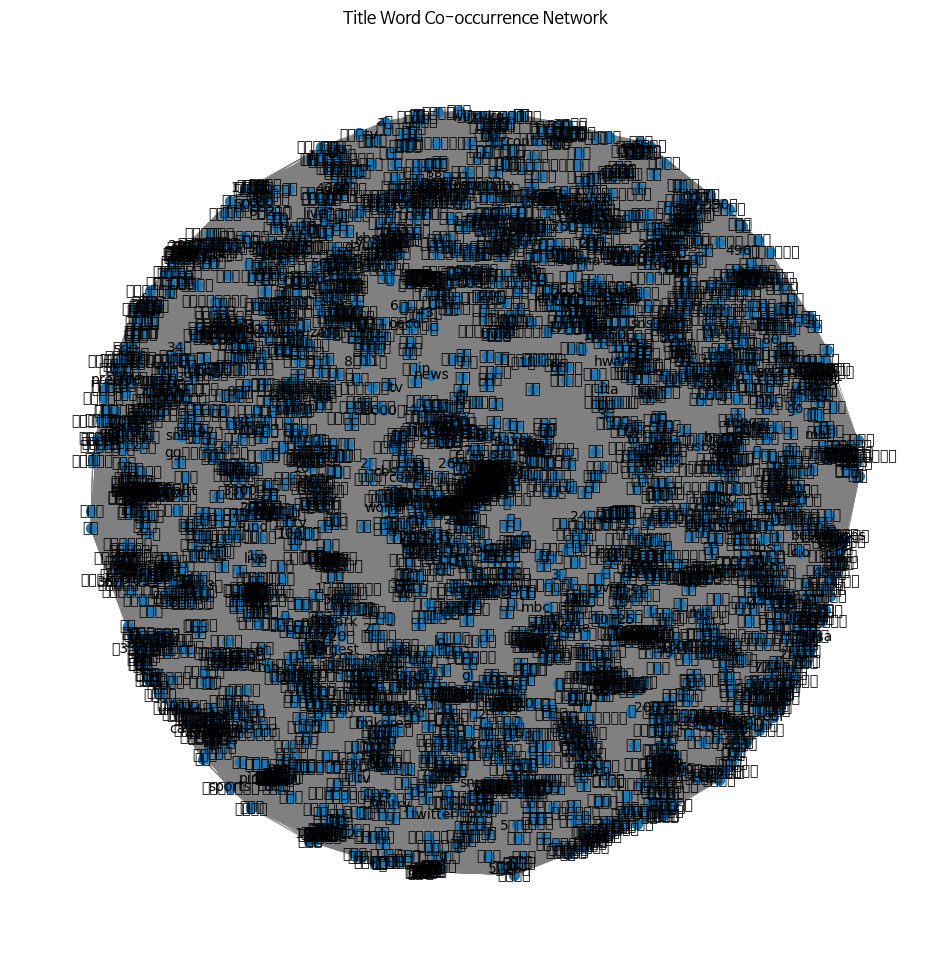

In [12]:
import networkx as nx
from itertools import combinations

# Function to create a network from frequencies
def create_network_from_frequencies(word_freq):
    G = nx.Graph()

    # Add edges based on the co-occurrence frequency of word pairs
    for word1, word2 in combinations(word_freq.keys(), 2):
        # Here, we simply add edges for word pairs with a co-occurrence frequency > 0
        # Ideally, you should calculate the actual co-occurrence frequency and use that value
        if word_freq[word1] > 0 and word_freq[word2] > 0:
            G.add_edge(word1, word2, weight=word_freq[word1] + word_freq[word2])

    return G

# Network creation
G_title = create_network_from_frequencies(title_word_freq)

# Network visualization
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_title, k=0.1)  # Determining node positions
nx.draw_networkx(G_title, pos, node_size=50, font_size=10, width=0.5, edge_color='gray', with_labels=True)
plt.title("Title Word Co-occurrence Network")
plt.axis('off')
plt.show()


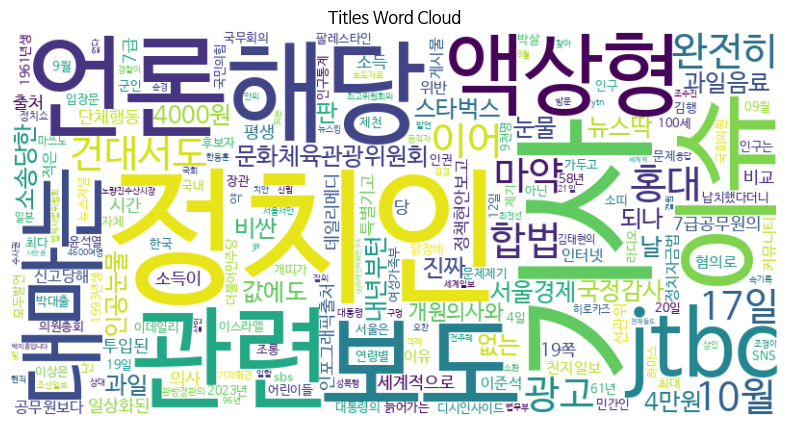

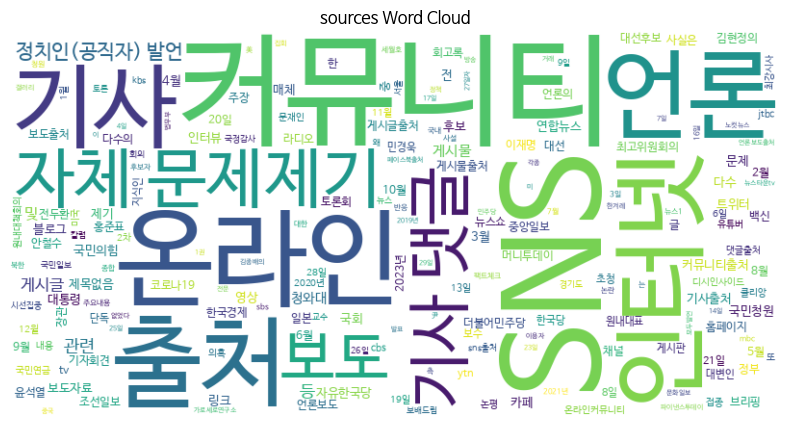

In [11]:
from wordcloud import WordCloud

# 워드 클라우드 생성
title_word_freq = get_word_frequencies(filtered_df['source'], set(), word_mapping)
title_wordcloud = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',  # 한글 폰트 경로
    width=800,
    height=400,
    background_color='white'
).generate(' '.join(title_word_freq))

source_word_freq = get_word_frequencies(filtered_df['source'], set(), word_mapping)  # 'judge' 열에 제외할 단어가 없다고 가정

source_wordcloud = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',  # 한글 폰트 경로
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(source_word_freq)


# 'title' 워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Titles Word Cloud')
plt.show()

# 'source' 워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(source_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('sources Word Cloud')
plt.show()
